In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [2]:
def load_files(path):
    df = pd.read_csv(path+'clustering_results.csv')
    
    domain = df['predictions'].values
    
    vec_d = df['vec_d_labels'].values
    vec_y = df['vec_y_labels'].values
    img_locs = df['image_id_labels'].values

    Z = np.load(path + "Z_space.npy")

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    #img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    
    return domain, vec_d, vec_y, img_locs

In [3]:
#Please insert yout path to the csv file associated with HER2 data (that contains scores)
base_path = "../../../DomId/HER2"
# base_path = "/your/data/location"

scores = pd.read_csv(
    os.path.join(base_path, "truthfile_002.csv"),
    names=["num", "file name", "s1", "s2", "s3", "s4", "s5", "s6", "s_7"],
)

In [4]:
def mean_scores_per_experiment(scores, img_locs):
    """
    Parser to get mean scores per image from the cvs file.
    The name of the images in the folders are slightly different from the names in the csv file.

    """

    M = []

    for prediction in img_locs:
        try:
            prediction = str(
                prediction.split("/")[-1]
            )  # depending if the path is full or not, take the img name only
        except:
            "not full path"

        if "s" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        if "S" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        else:
            N = len(prediction) - 6
            # print('secod case', N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
            # print(mean_score)
        mean_score = float(mean_score)
        # print(mean_score)
        M.append(mean_score)
    return M

In [5]:
def box_plot_per_domain(domain, M, fs, c, title, up, true_ex=False):
    """
    Box plot for median scores
    domain - predicted domain
    M - corresponding mean scores
    c - color fill for the box plot
    title - title of the experiment
    up - vertical displacement of the text
    true_ex  - if ground truth values (not domain, but true labels are inputted)

    """
    data1 = []
    data2 = []
    data3 = []
    # data4 = []

    for i in range(len(domain)):
        if domain[i] == 1:
            data1.append(M[i])
        if domain[i] == 2:
            data2.append(M[i])
        if domain[i] == 3:
            data3.append(M[i])
    #         if domain[i] ==4:
    #             data4.append(M[i])

    data = [data1, data2, data3]
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c, color='black'))

    ax.text(
        0.85,
        np.mean(data[0]) + up,
        str(np.mean(data[0]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        1.85,
        np.mean(data[1]) + up,
        str(np.mean(data[1]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        2.85,
        np.mean(data[2]) + up,
        str(np.mean(data[2]))[:5],
        color="black",
        fontsize=fs,
    )

    plt.xlabel("Domain", fontsize=fs)
    plt.ylabel("HER2/neu Scores", fontsize=fs)
    plt.title(title, fontsize=fs, weight = 'bold')
    plt.xticks(fontsize=fs, weight="bold")
    plt.yticks(fontsize=fs - 5)
    if true_ex == True:
        plt.xticks([1, 2, 3], ["FD", "H", "ND"], fontsize=fs)
        plt.title("Original Dataset:" + title, fontsize=fs)
    plt.show()

In [6]:
ex1 = '2023-05-05 11:36:39.043485_her2_vade/' #should be base VaDE
ex2 = '2023-05-05 11:47:59.770397_her2_vade/' #should be CDVADE
ex3 = None #should be DEC

# number_predicted_domains = 3  # enter d_dim
colors = ["powderblue","cadetblue", "teal" ]

In [7]:
domain1, _, _, img_locs1 = load_files(ex1)

/tmp/ipykernel_18734/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_18734/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_18734/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


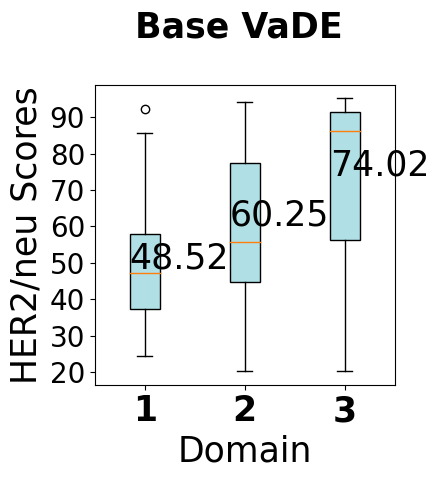

In [8]:
M1 = mean_scores_per_experiment(scores, img_locs1)
box_plot_per_domain(domain1, M1, 25, "powderblue", "Base VaDE \n ", False)

In [9]:
domain2, _, _, img_locs2  = load_files(ex2)

/tmp/ipykernel_18734/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_18734/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_18734/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


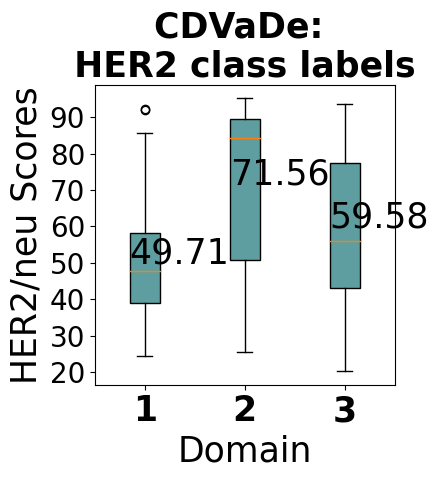

In [10]:


M2 = mean_scores_per_experiment(scores, img_locs2)
box_plot_per_domain(
    domain2,
    M2,
    25,
    "cadetblue",
    "CDVaDe: \n HER2 class labels ",
    False,
)

In [ ]:
domain3, _, _, img_locs3  = load_files(ex3)


M3 = mean_scores_per_experiment(scores, img_locs3)
box_plot_per_domain(
    domain3,
    M3,
    25,
    "lightgrey",
    "Base DEC \n ",
    False,
)